In [3]:
!pip install wordcloud


In [4]:
from wordcloud import WordCloud


In [5]:
# 📊 Project: Unveiling the Android App Market
# 🧠 Objective: Analyze app trends, reviews, and sentiments using Excel data

# 🔹 Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Jupyter magic to show plots inline
%matplotlib inline


In [9]:
# Load CSVs
apps = pd.read_csv('apps.csv')
reviews = pd.read_csv('user_reviews.csv')

# Preview data
apps.head(), reviews.head()


(   Unnamed: 0                                                App  \
 0           0     Photo Editor & Candy Camera & Grid & ScrapBook   
 1           1                                Coloring book moana   
 2           2  U Launcher Lite – FREE Live Cool Themes, Hide ...   
 3           3                              Sketch - Draw & Paint   
 4           4              Pixel Draw - Number Art Coloring Book   
 
          Category  Rating  Reviews  Size     Installs  Type Price  \
 0  ART_AND_DESIGN     4.1      159  19.0      10,000+  Free     0   
 1  ART_AND_DESIGN     3.9      967  14.0     500,000+  Free     0   
 2  ART_AND_DESIGN     4.7    87510   8.7   5,000,000+  Free     0   
 3  ART_AND_DESIGN     4.5   215644  25.0  50,000,000+  Free     0   
 4  ART_AND_DESIGN     4.3      967   2.8     100,000+  Free     0   
 
   Content Rating                     Genres      Last Updated  \
 0       Everyone               Art & Design   January 7, 2018   
 1       Everyone  Art & Desig

In [10]:
# Remove duplicate apps
apps.drop_duplicates(inplace=True)

# Drop rows with missing rating
apps.dropna(subset=['Rating'], inplace=True)

# Convert Reviews to int
apps['Reviews'] = apps['Reviews'].astype(str).str.replace(',', '').astype(int)

# Clean Installs
apps['Installs'] = apps['Installs'].astype(str).str.replace('[+,]', '', regex=True).astype(float)

# Convert Size to MB
def size_to_mb(size):
    if isinstance(size, str):
        if 'M' in size:
            return float(size.replace('M', ''))
        elif 'k' in size:
            return float(size.replace('k', '')) / 1024
    return None

apps['Size_MB'] = apps['Size'].apply(size_to_mb)


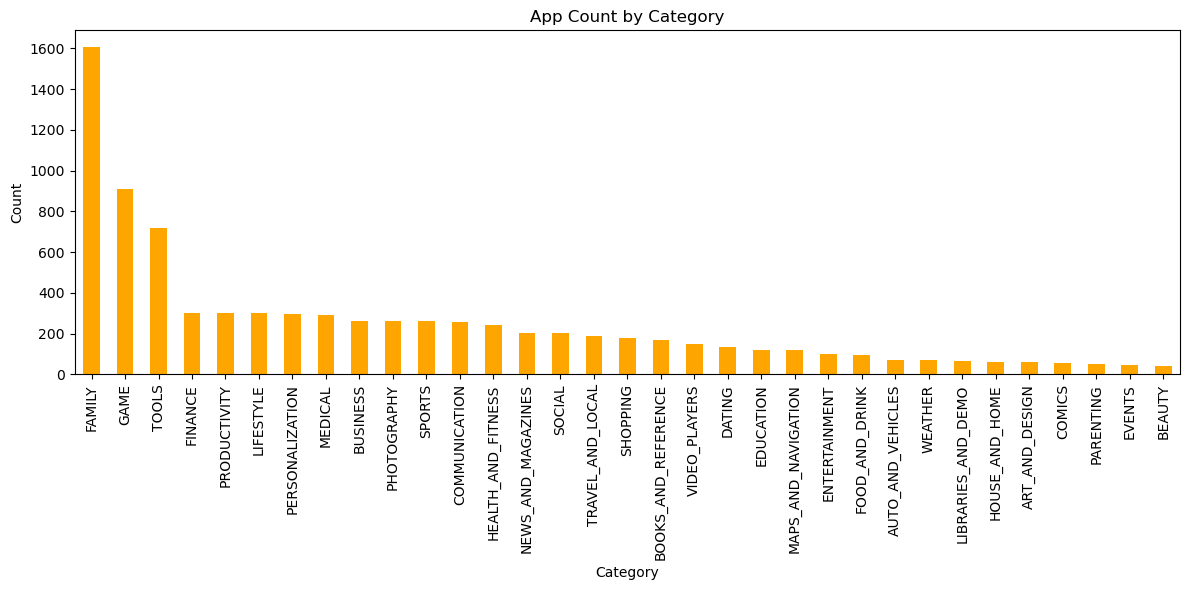

In [11]:
plt.figure(figsize=(12, 6))
apps['Category'].value_counts().plot(kind='bar', color='orange')
plt.title('App Count by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


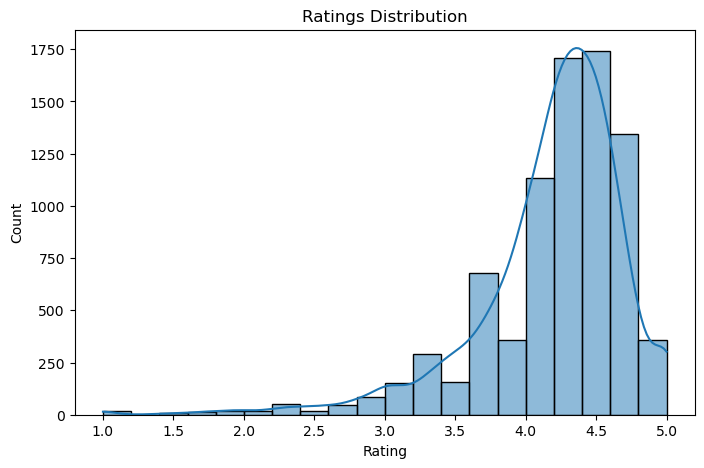

,App,Installs
152,Google Play Books,1.000000e+09
1356,Subway Surfers,1.000000e+09
2930,Google Play Movies & TV,1.000000e+09
2720,Google Drive,1.000000e+09
299,Messenger – Text and Video Chat for Free,1.000000e+09
300,WhatsApp Messenger,1.000000e+09
2908,YouTube,1.000000e+09
2507,Google,1.000000e+09
701,Google Play Games,1.000000e+09
2429,Google Street View,1.000000e+09


In [12]:
# Rating distribution
plt.figure(figsize=(8, 5))
sns.histplot(apps['Rating'], bins=20, kde=True)
plt.title('Ratings Distribution')
plt.xlabel('Rating')
plt.show()

# Most installed apps
top_apps = apps.sort_values(by='Installs', ascending=False).head(10)
top_apps[['App', 'Installs']]


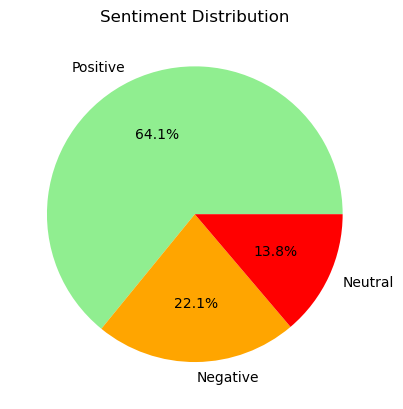

In [13]:
# Count of sentiments
reviews['Sentiment'].value_counts()

# Pie chart
reviews['Sentiment'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightgreen', 'orange', 'red'])
plt.title('Sentiment Distribution')
plt.ylabel('')
plt.show()


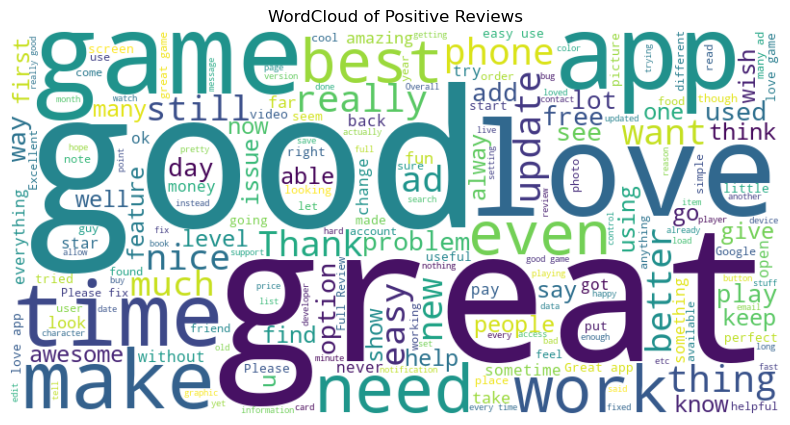

In [14]:
# Positive reviews
text = ' '.join(reviews[reviews['Sentiment'] == 'Positive']['Translated_Review'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Positive Reviews')
plt.show()


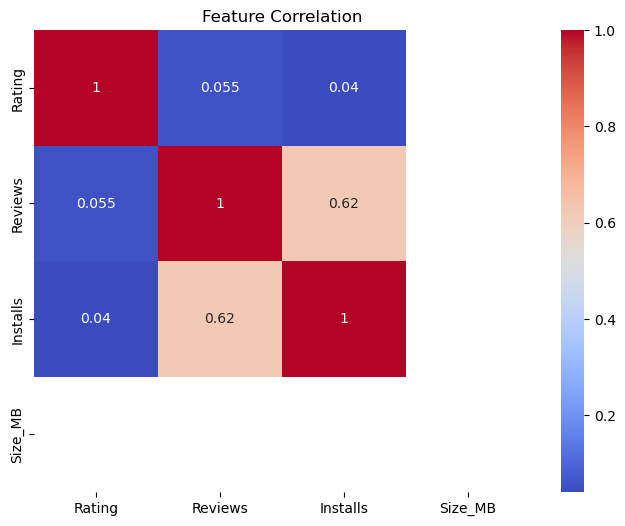

In [15]:
plt.figure(figsize=(8, 6))
sns.heatmap(apps[['Rating', 'Reviews', 'Installs', 'Size_MB']].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()


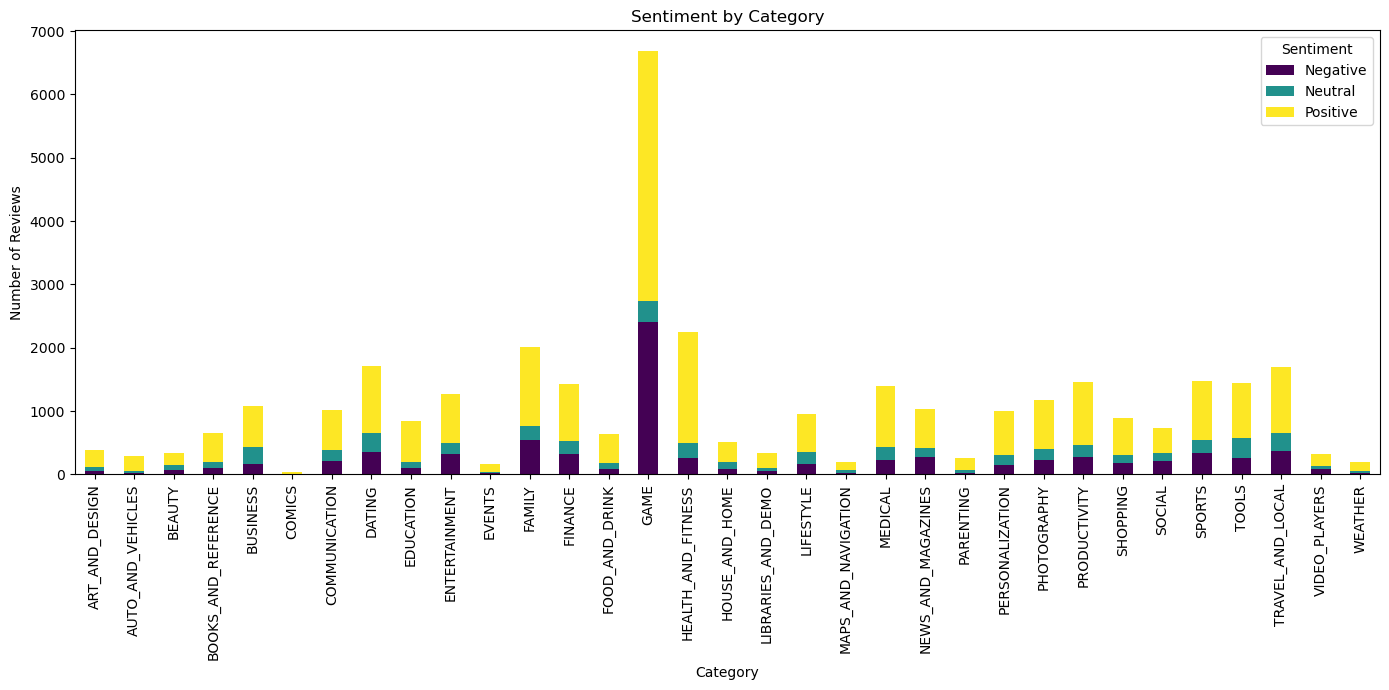

In [16]:
# Merge datasets
merged = pd.merge(apps, reviews, on='App', how='inner')

# Group and plot
sentiment_summary = merged.groupby(['Category', 'Sentiment']).size().unstack().fillna(0)

sentiment_summary.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='viridis')
plt.title('Sentiment by Category')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
